In [136]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from time import sleep

##  Generate synthetic data

In [60]:
N = 100 # count of data points
Xpos = np.random.multivariate_normal((1,1),[[1,0],[0,1]],int(N/2))
Xneg = np.random.multivariate_normal((-2,-2),[[1,0],[0,1]],int(N/2))

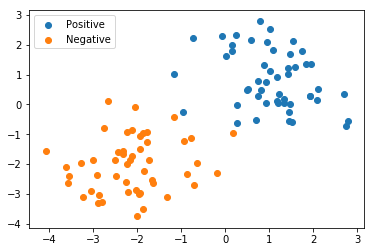

In [61]:
plt.scatter(Xpos[:,0],Xpos[:,1])
plt.scatter(Xneg[:,0],Xneg[:,1])
plt.legend(("Positive", "Negative"));

Put the positive and negative instances together

In [70]:
X = np.vstack((Xpos,Xneg))
y = np.hstack((np.ones(int(N/2)),np.zeros(int(N/2))))

And shuffle them to remove any structure.

In [79]:
ind = np.random.permutation(N)
X = np.hstack((np.ones((N,1)), X[ind,:])) # add the fixed column of ones for bias.
y = y[ind]

## Perceptron Learning Algorithm

Start with an arbitrary weight vector $w$.

In [171]:
w = np.random.uniform(-1,1,3)
print(w)

[ 0.08790329  0.46189486  0.19787009]


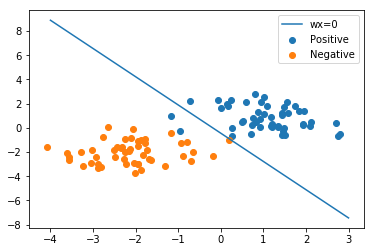

In [172]:
xline = np.linspace(-4,3,100)
yline = -(w[1]*xline+w[0])/w[2]
plt.plot(xline, yline)
plt.scatter(Xpos[:,0],Xpos[:,1])
plt.scatter(Xneg[:,0],Xneg[:,1])
plt.legend(("wx=0","Positive", "Negative"));

/home/kaan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


best solution found


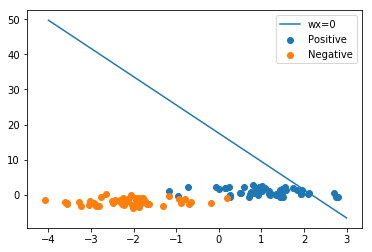

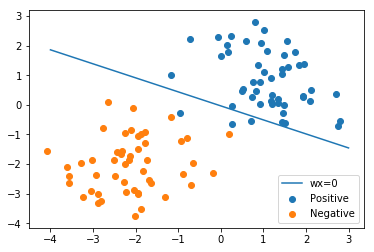

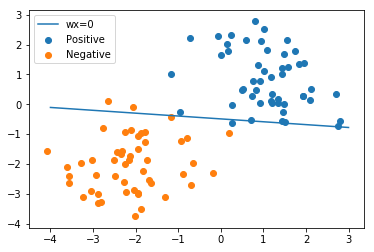

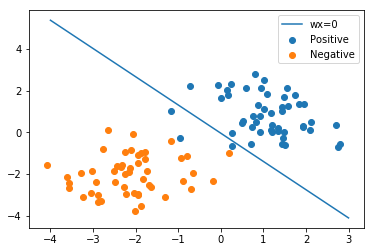

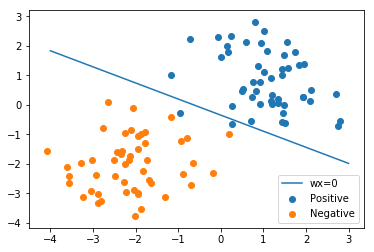

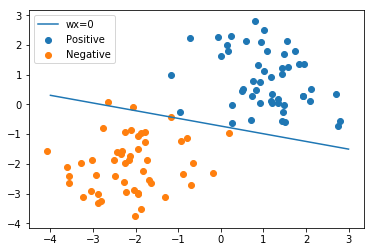

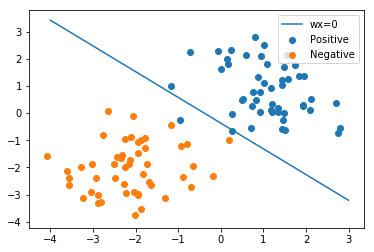

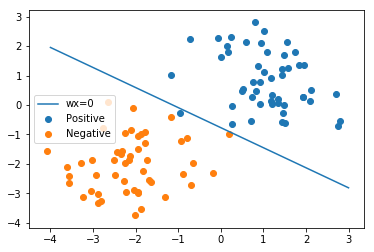

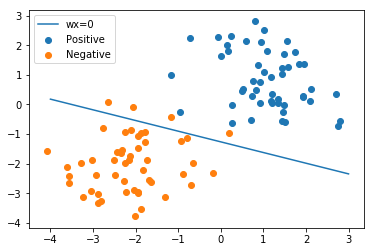

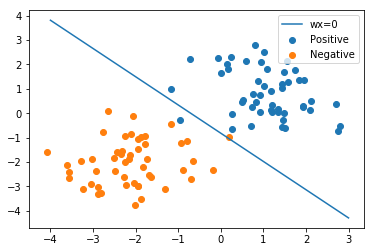

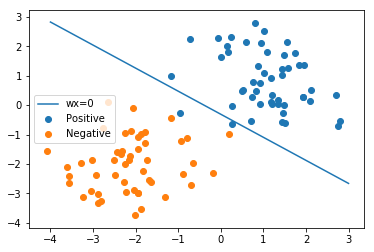

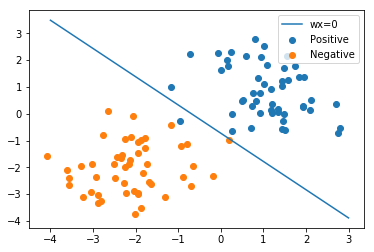

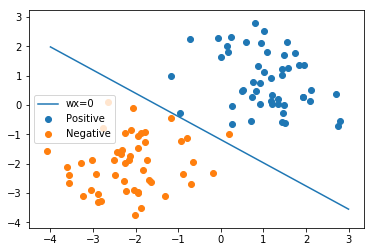

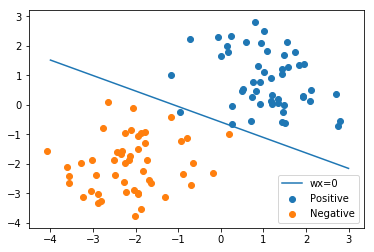

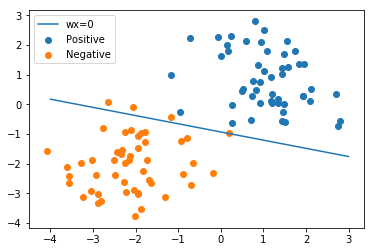

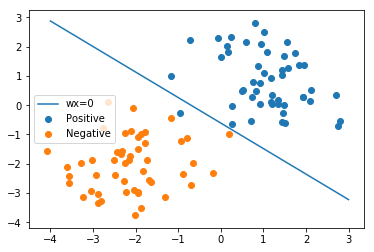

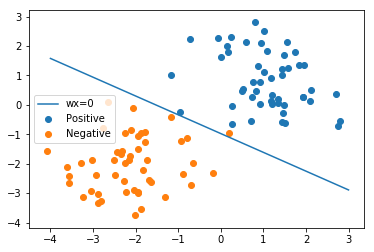

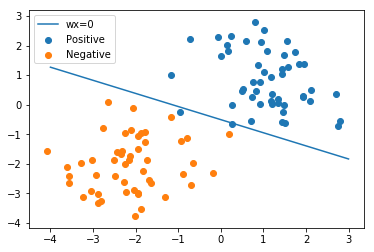

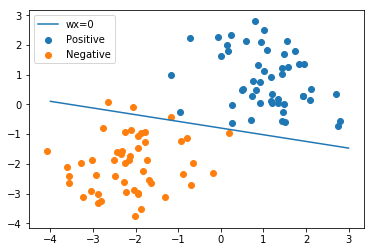

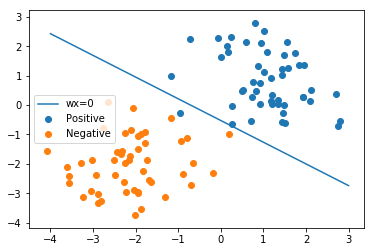

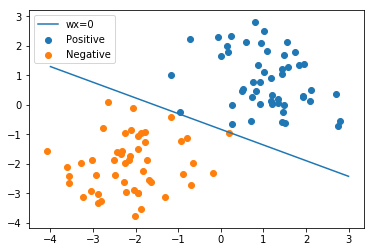

In [173]:
xline = np.linspace(-4,3,100)

for repeat in range(50):
    predicted = [1 if i else 0 for i in np.dot(X,w)>0];
    misclassified = [i for i in range(N) if predicted[i]!=y[i]]
    if not misclassified:
        print("best solution found")
        break
    # Choose a random misclassified point
    i = np.random.choice(misclassified)
    # Update the weight vector
    w = w + 1*(y[i]-predicted[i])*X[i,:]
    #print(w)
    
    plt.figure()
    yline = -(w[1]*xline+w[0])/w[2]
    plt.plot(xline, yline)
    plt.scatter(Xpos[:,0],Xpos[:,1])
    plt.scatter(Xneg[:,0],Xneg[:,1])
    plt.legend(("wx=0","Positive", "Negative"))